In [26]:
import numpy
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
%matplotlib inline  

import sys
sys.path.append('../../main/kernel/')
import kernelFun 
import rbfKernelApprox


n_samples = 5000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.08)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.08)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = numpy.random.rand(n_samples, 2), None
noisy_s_curve = datasets.make_s_curve(n_samples=n_samples, noise=0.05)

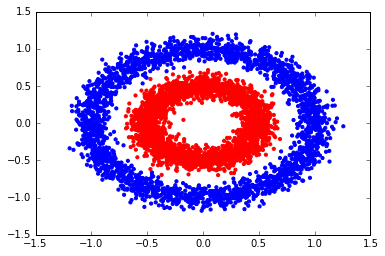

In [46]:
X = noisy_circles[0]
y = noisy_circles[1]
dataname = 'circle'

colors = numpy.array([x for x in 'brgcmykbgrcmykbgrcmykbgrcmyk'])
colors = numpy.hstack([colors] * 20)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=colors[y].tolist(), s=10)
plt.show()
fig.savefig(dataname + '.pdf', format='pdf', dpi=1200)

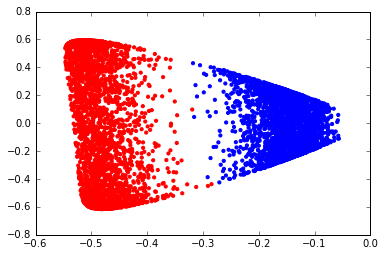

In [48]:
sigma = 0.3
matK = kernelFun.rbf(X, X, sigma)
matU, vecS, _ = numpy.linalg.svd(matK, full_matrices=False)
k = 2
matXkpca = matU[:, 0:k] * numpy.sqrt(vecS[0:k]).reshape(1, k)

fig = plt.figure()
plt.scatter(matXkpca[:, 0], matXkpca[:, 1], color=colors[y].tolist(), s=10)
plt.show()
fig.savefig(dataname + '_kpca_sig03.pdf', format='pdf', dpi=1200)

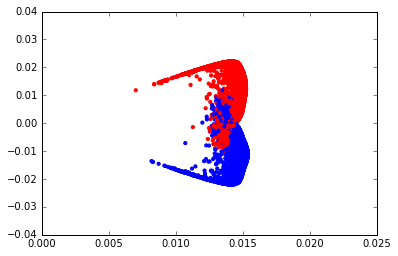

In [97]:
n = matK.shape[0]
vecD = numpy.sum(matK, axis=1)
vecD = 1 / numpy.sqrt(vecD)
matA = matK * vecD.reshape(n, 1)
matA = matA * vecD.reshape(1, n)
matA = (matA + matA.T) / 2
matU, _, _ = numpy.linalg.svd(matA, full_matrices=False)


fig = plt.figure()
plt.scatter(matU[:, 0], matU[:, 1], color=colors[y].tolist(), s=10)
plt.show()
fig.savefig(dataname + '_eigmap_sig03.pdf', format='pdf', dpi=1200)

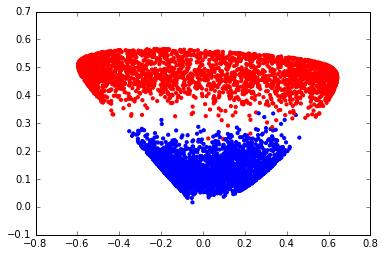

In [66]:
sigma = 0.3

s = 3000
#matU, vecS = rbfKernelApprox.nystrom(X, sigma, s, 'Uniform')
#matU, vecS = rbfKernelApprox.fastSPSD(X, sigma, s, 'Uniform')
matU, vecS = rbfKernelApprox.randFeature(X, sigma, s)

k = 5
matXkpca = matU[:, 0:k] * vecS[0:k].reshape(1, k)

fig = plt.figure()
plt.scatter(matXkpca[:, 1], matXkpca[:, 0], color=colors[y].tolist(), s=10)
plt.show()
fig.savefig(dataname + '_kpca_sig03_rfm' + str(s) + '.pdf', format='pdf', dpi=1200)

[ 134.81217415]


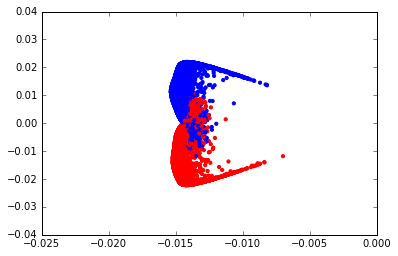

In [101]:

d = len(vecS)
degree = numpy.sum(matU, axis=0)
degree = (vecS * vecS).reshape(d, 1) * degree.reshape(d, 1)
degree = numpy.dot(matU, degree)
print(min(degree))

matL = matU * vecS.reshape(1, d)
matL = matL / numpy.sqrt(degree)
matUL, _, _ = numpy.linalg.svd(matL, full_matrices=False)

normalizer = numpy.sum(matUL ** 2, axis=1)
matUL = matUL #/ (numpy.sqrt(normalizer)).reshape(len(normalizer), 1)

fig = plt.figure()
plt.scatter(matUL[:, 0], matUL[:, 1], color=colors[y].tolist(), s=10)
plt.show()
fig.savefig(dataname + '_eigmap_sig03_nys' + str(s) + '.pdf', format='pdf', dpi=1200)